In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Load the dataset
file_path = "car data.csv"  # Update this if necessary
df = pd.read_csv(file_path)

In [3]:
# Data Preprocessing
df['Car_Age'] = 2025 - df['Year']  # Convert Year to Car Age
df.drop(columns=['Car_Name', 'Year'], inplace=True)  # Drop unnecessary columns
df = pd.get_dummies(df, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)

In [4]:
# Define features (X) and target variable (y)
X = df.drop(columns=['Selling_Price'])
y = df['Selling_Price']

In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [7]:
# Make predictions
y_pred = model.predict(X_test)

In [8]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

In [9]:
# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Absolute Error (MAE): 0.64
Mean Squared Error (MSE): 0.93
Root Mean Squared Error (RMSE): 0.97
R-squared (R²): 0.96


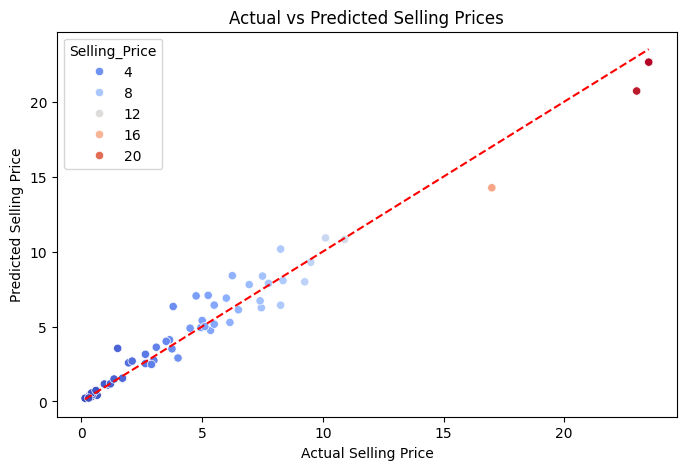

In [14]:
# Visualize Predictions vs Actual Values
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, hue=y_test, palette='coolwarm')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal (Actual = Predicted)')
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Prices")
plt.show()
